In [98]:
%matplotlib inline
import numpy as np
from numpy import loadtxt
from lmfit.models import ExponentialModel, ConstantModel
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages


In [105]:
def red(time):
    '''
    This should eliminate the issue of the weird time jump about 2/3 of way through collection also that t=0 if 0 counts
    '''
    return np.arange(0,len(time))
def hours(secs,counts):
    import numpy
    hours=numpy.arange(0,secs[len(secs)-1]//3600+1)
    binned_counts=[0]*len(hours)
    for i in range(0,len(secs)):
        index=i//3600
        binned_counts[index]+=counts[i]
    return hours,binned_counts
def sin(x, amp,omega,shift,y0):
    """ model decaying sine wave, subtract data"""
    return amp * np.sin(x * omega + shift)+y0
def doFit(hour_time,binned_counts):
    from lmfit import Model
    gmod = Model(sin)
    params = gmod.make_params(amp=50, omega=.26,shift=0,y0=18800)
    params.add('omega',value=2*np.pi/24,vary=False)
    params.add('y0',value=np.average(binned_counts))
    result = gmod.fit(binned_counts,params,x=hour_time,weights=1/np.sqrt(binned_counts))

    print(result.fit_report())
    result.plot(fig_kws={'figsize':(10,10)})
    return result
def doFit2(time,rates):
    time,rates = filter(time,rates)
    hour_time,binned_counts=hours(red(time),rate)
    length = len(binned_counts)
    while binned_counts[length-1]<binned_counts[length-2]*.9:
        hour_time=hour_time[:-1]
        binned_counts=binned_counts[:-1]
        length = len(binned_counts)
        
    from lmfit import Model
    gmod = Model(sin)
    params = gmod.make_params(amp=50, omega=.26,shift=0,y0=18800)
    params.add('omega',value=2*np.pi/24,vary=False)
    params.add('y0',value=np.average(binned_counts))
    result = gmod.fit(binned_counts,params,x=hour_time,weights=1/np.sqrt(binned_counts))

    print(result.fit_report())
    result.plot(fig_kws={'figsize':(10,10)})
    return result,hour_time,binned_counts
def filter(time,rate):
    returnTime=[]
    returnRate=[]
    for i in range(len(time)):
        if time[i]!=0 and rate[i] == 0:
            continue
        else:
            returnTime.append(time[i])
            returnRate.append(rate[i])
    return returnTime,returnRate

[[Model]]
    Model(sin)
[[Fit Statistics]]
    # function evals   = 28
    # data points      = 38
    # variables        = 3
    chi-square         = 41.506
    reduced chi-square = 1.186
[[Variables]]
    amp:     95.3160251 +/- 35.24721 (36.98%) (init= 50)
    omega:   0.2617994 (fixed)
    shift:  -1.36886102 +/- 0.398203 (29.09%) (init= 0)
    y0:      20499.5272 +/- 26.36554 (0.13%) (init= 20506.68)
[[Correlations]] (unreported correlations are <  0.100)
    C(shift, y0)                 = -0.270 



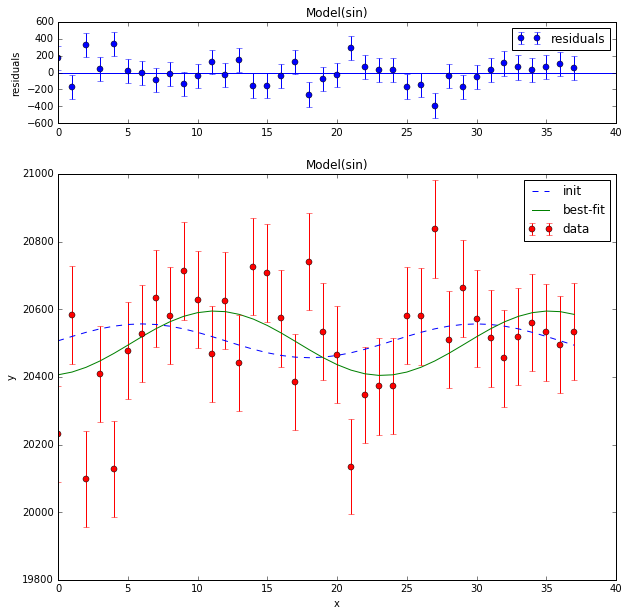

In [100]:
time, rate = np.loadtxt('Data/Luke_Ian/Luke_Perry_IanRate2015_12_08-13-33.txt', unpack=True)
doFit2(time,rate)

[[Model]]
    Model(sin)
[[Fit Statistics]]
    # function evals   = 34
    # data points      = 36
    # variables        = 3
    chi-square         = 61.458
    reduced chi-square = 1.862
[[Variables]]
    amp:     1182.12671 +/- 121.8304 (10.31%) (init= 50)
    omega:   0.2617994 (fixed)
    shift:   1.12308241 +/- 0.105020 (9.35%) (init= 0)
    y0:      1.3927e+05 +/- 88.96609 (0.06%) (init= 139410.6)
[[Correlations]] (unreported correlations are <  0.100)
    C(shift, y0)                 =  0.255 
    C(amp, y0)                   = -0.164 



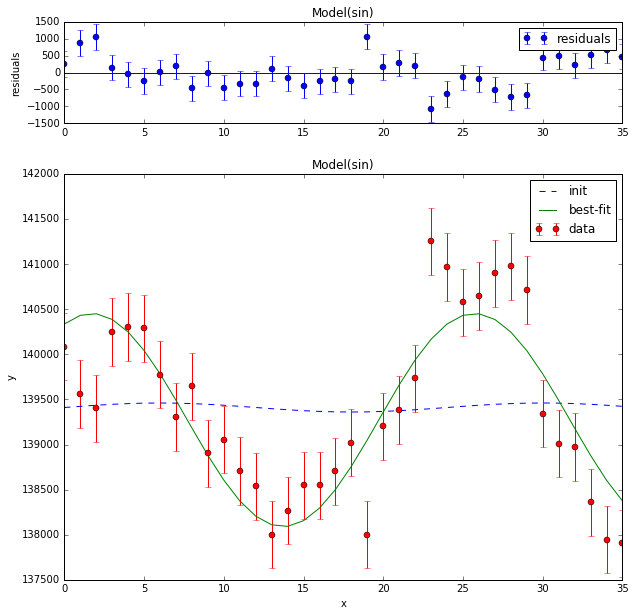

In [101]:
time, rate = np.loadtxt('Data/Luke_Ian/Luke_Perry_IanRate2015_12_03-13-02.txt', unpack=True)
doFit2(time,rate)

[[Model]]
    Model(sin)
[[Fit Statistics]]
    # function evals   = 29
    # data points      = 46
    # variables        = 3
    chi-square         = 293.633
    reduced chi-square = 6.829
[[Variables]]
    amp:     632.741572 +/- 186.8383 (29.53%) (init= 50)
    omega:   0.2617994 (fixed)
    shift:  -1.13140260 +/- 0.282549 (24.97%) (init= 0)
    y0:      1.1216e+05 +/- 129.2726 (0.12%) (init= 112196.9)
[[Correlations]] (unreported correlations are <  0.100)



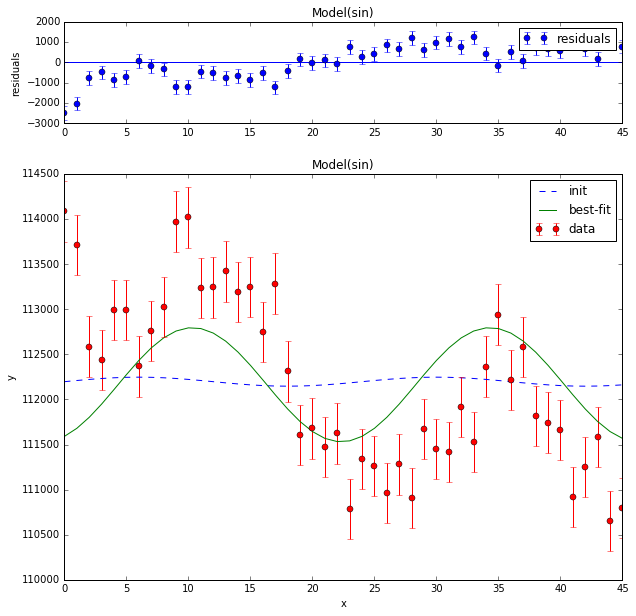

In [102]:
time,rate = np.loadtxt('Data/Corina_Ian_Thres208mVRate2015_11_05-13-33.txt', unpack=True)
doFit2(time,rate)

[[Model]]
    Model(sin)
[[Fit Statistics]]
    # function evals   = 27
    # data points      = 83
    # variables        = 3
    chi-square         = 172.274
    reduced chi-square = 2.153
[[Variables]]
    amp:    -24.3036239 +/- 31.37888 (129.11%) (init= 50)
    omega:   0.2617994 (fixed)
    shift:  -0.71871222 +/- 1.290198 (179.52%) (init= 0)
    y0:      18802.7045 +/- 22.27263 (0.12%) (init= 18803.54)
[[Correlations]] (unreported correlations are <  0.100)
    C(shift, y0)                 =  0.107 



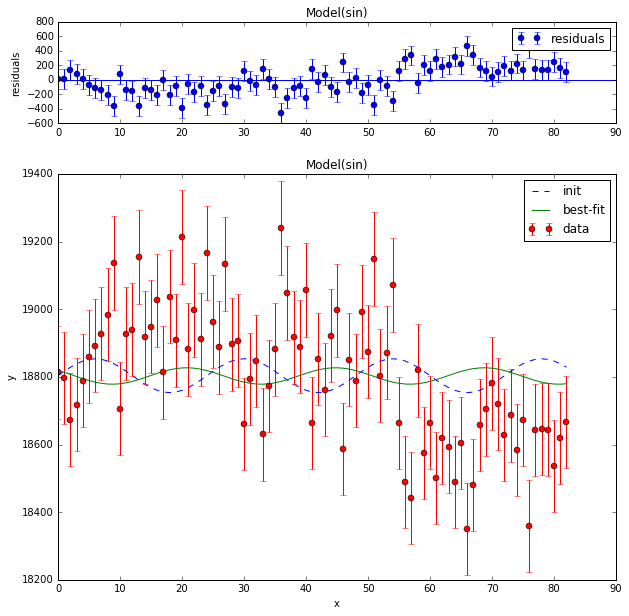

In [103]:
time,rate = np.loadtxt('Data/Corina_Ian_Thres400mVRate2015_11_09-01-48.txt', unpack=True)
doFit2(time,rate)

# Temperature Stuff

In [7]:
time_temp,temp = np.loadtxt('Data/tempData.txt',unpack=True)

In [ ]:
#fname = 'Data/tempData.txt'
fname = 'Data/foo.txt'
f = open(fname)
f.readline()
days_hours=[]
days_temp =[]
#for i in range(564180//3600-1):
for i in range(24*3):   
    temp = np.empty([1])
    startDay = i
    endDay   = i+1
    print('hour: '+str(i))
    for i in range(3600*48*startDay,3600*48*endDay):
        line = f.readline()
        if line=='':
            continue

        if len(line.split('\t'))==2:
            temp = np.append(temp,float(line.split('\t')[1]))
    temp_hours,temp_red =hours(red(temp),temp)
    days_hours.append(temp_hours[:-1])
    days_temp.append(temp_red[:-1])
#print(temp)



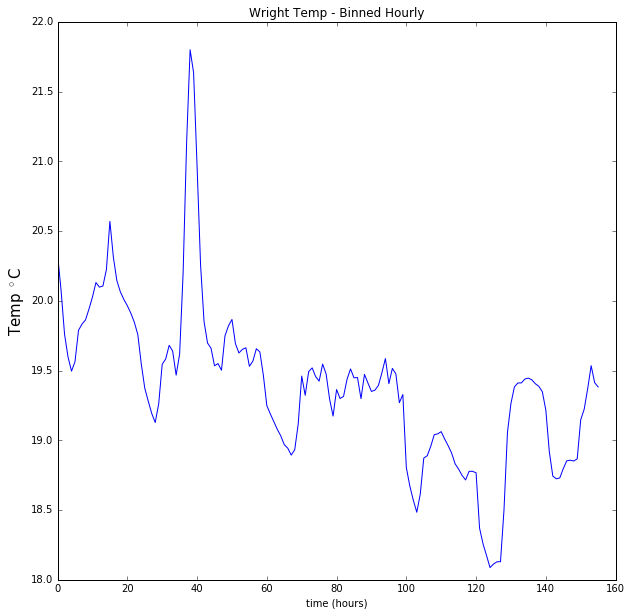

In [225]:
total_temp = []
total_hour = []
for i in range(len(days_temp)):
    for j in range(len(days_temp[i])):
        total_temp.append(days_temp[i][j])
        total_hour.append(days_hours[i][j])
        #print(days_hours[i][j])
total_temp=np.array(total_temp)/3600
total_hour=np.arange(len(total_temp))
plt.figure(figsize=(10,10))
plt.plot(total_hour,total_temp)

plt.ylabel('Temp '+r'$^\circ$'+'C',fontsize=15)
plt.xlabel('time (hours)')
plt.title('Wright Temp - Binned Hourly')
plt.show()

[[Model]]
    Model(sin)
[[Fit Statistics]]
    # function evals   = 34
    # data points      = 36
    # variables        = 3
    chi-square         = 61.458
    reduced chi-square = 1.862
[[Variables]]
    amp:     1182.12671 +/- 121.8304 (10.31%) (init= 50)
    omega:   0.2617994 (fixed)
    shift:   1.12308241 +/- 0.105020 (9.35%) (init= 0)
    y0:      1.3927e+05 +/- 88.96609 (0.06%) (init= 139410.6)
[[Correlations]] (unreported correlations are <  0.100)
    C(shift, y0)                 =  0.255 
    C(amp, y0)                   = -0.164 

[[Model]]
    Model(sin)
[[Fit Statistics]]
    # function evals   = 28
    # data points      = 38
    # variables        = 3
    chi-square         = 41.506
    reduced chi-square = 1.186
[[Variables]]
    amp:     95.3160251 +/- 35.24721 (36.98%) (init= 50)
    omega:   0.2617994 (fixed)
    shift:  -1.36886102 +/- 0.398203 (29.09%) (init= 0)
    y0:      20499.5272 +/- 26.36554 (0.13%) (init= 20506.68)
[[Correlations]] (unreported correlati

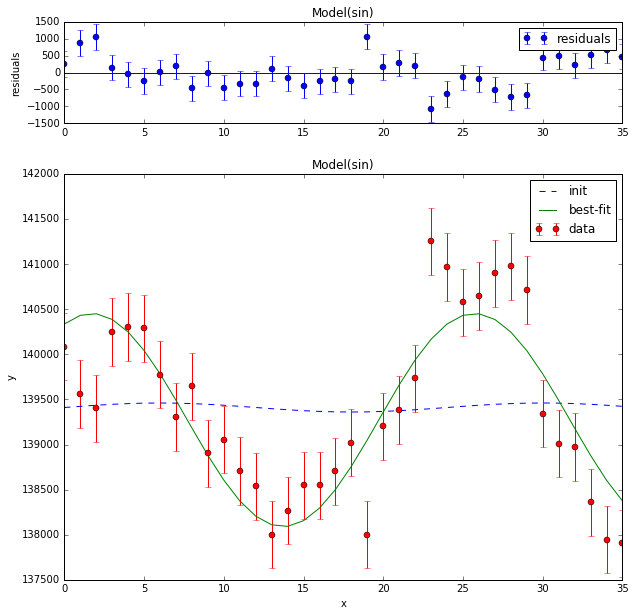

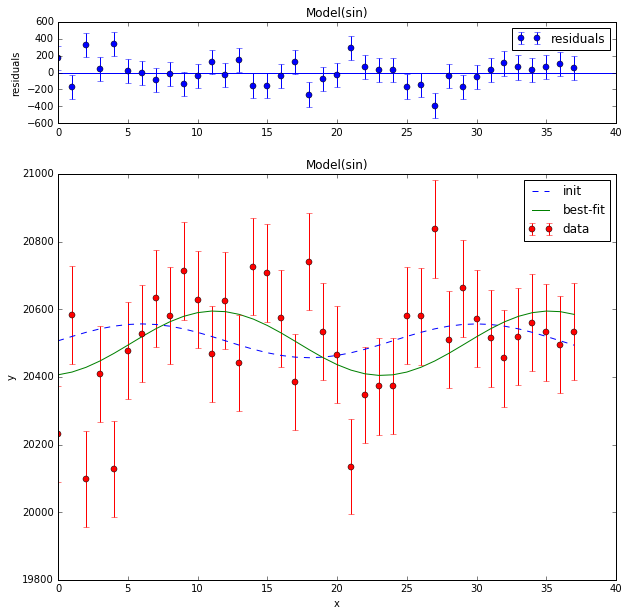

In [165]:
time, rate = np.loadtxt('Data/Luke_Ian/Luke_Perry_IanRate2015_12_03-13-02.txt', unpack=True)
out,hour_time,binned_counts=doFit2(time,rate)
time, rate = np.loadtxt('Data/Luke_Ian/Luke_Perry_IanRate2015_12_08-13-33.txt', unpack=True)
out_8,hour_time_8,binned_counts_8 = doFit2(time,rate)

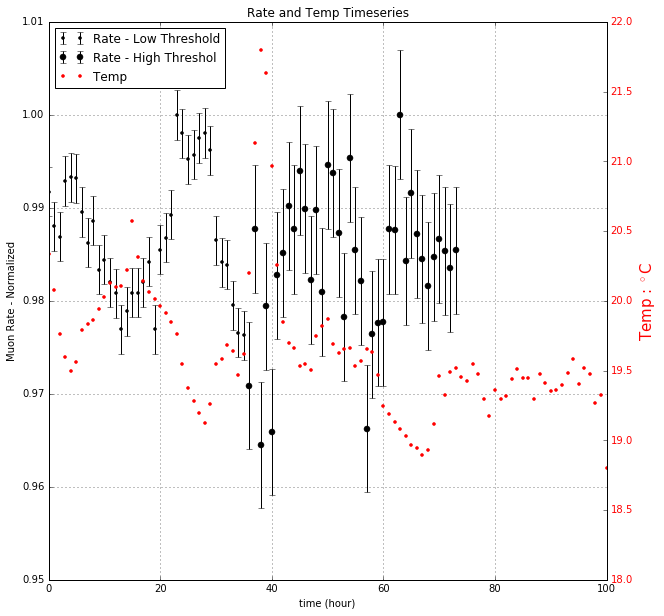

In [244]:
fig, ax1 = plt.subplots(figsize=(10,10))

ax1.errorbar(hour_time,cor_counts, fmt='k.',yerr=yerr1,label="Rate - Low Threshold")
ax1.errorbar(hour_time_8+36,cor_counts_8, fmt='ko',yerr=yerr8,label="Rate - High Threshol")
ax1.set_xlabel('time (hour)')
# Make the y-axis label and tick labels match the line color.
ax1.set_ylabel('Muon Rate - Normalized')
for tl in ax1.get_yticklabels():
    tl.set_color('k')
ax1.set_xlim([0,100])
ax1.legend()
ax2 = ax1.twinx()
ax2.plot(total_hour, total_temp, 'r.',label='Temp')
ax2.set_ylabel('Temp '+r': $^\circ$'+'C',fontsize=15,color='r')
for tl in ax2.get_yticklabels():
    tl.set_color('r')
ax2.set_xlim([0,100])
h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax1.legend(h1+h2, l1+l2, loc=2)
ax1.grid()
plt.title('Rate and Temp Timeseries')
plt.show()

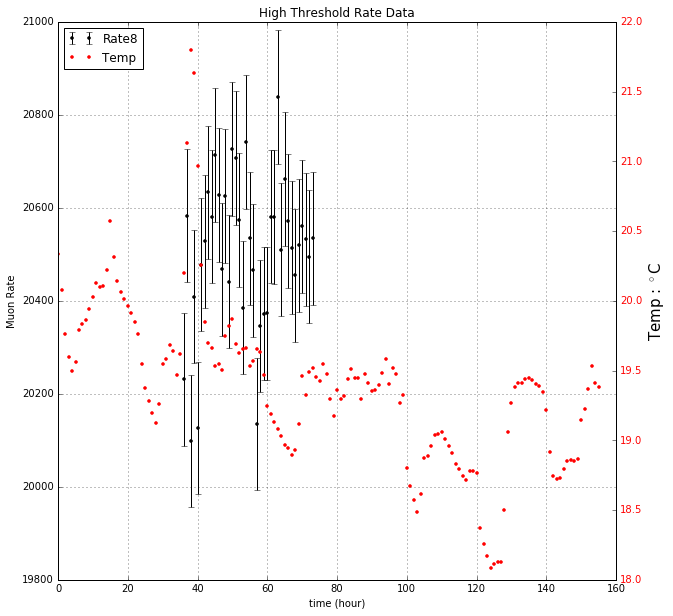

In [229]:
fig, ax1 = plt.subplots(figsize=(10,10))

ax1.errorbar(hour_time_8+36,binned_counts_8, fmt='k.',yerr=np.sqrt(binned_counts_8),label="Rate8")
ax1.set_xlabel('time (hour)')
# Make the y-axis label and tick labels match the line color.
ax1.set_ylabel('Muon Rate')
for tl in ax1.get_yticklabels():
    tl.set_color('k')
#ax1.set_xlim([50,100])
ax1.legend()
ax2 = ax1.twinx()
ax2.plot(total_hour, total_temp, 'r.',label='Temp')
ax2.set_ylabel('Temp '+r': $^\circ$'+'C',fontsize=15)
for tl in ax2.get_yticklabels():
    tl.set_color('r')
#ax2.set_xlim([50,100])
h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax1.legend(h1+h2, l1+l2, loc=2)
ax1.grid()
plt.title('High Threshold Rate Data')

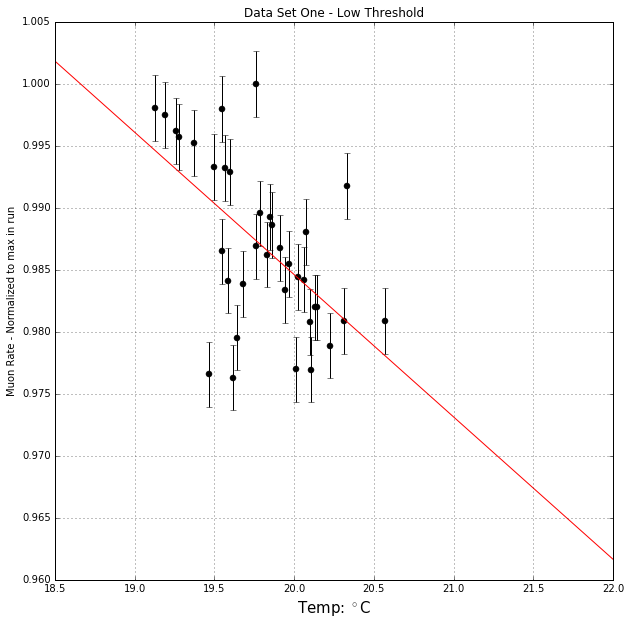

[[Model]]
    Model(linear)
[[Fit Statistics]]
    # function evals   = 8
    # data points      = 36
    # variables        = 2
    chi-square         = 159.002
    reduced chi-square = 4.677
[[Variables]]
    slope:      -0.01147674 +/- 0.002808 (24.47%) (init=-0.0115128)
    intercept:   1.21415101 +/- 0.055605 (4.58%) (init= 1.214896)
[[Correlations]] (unreported correlations are <  0.100)
    C(slope, intercept)          = -1.000 



In [218]:
def normalize(rate,err):
    return rate/max(rate),err/max(rate)


cor_counts,yerr1=normalize(binned_counts,np.sqrt(binned_counts))

from lmfit.models import LinearModel
cor_mod = LinearModel()
pars = cor_mod.guess(cor_counts,x=total_temp[:len(cor_counts)])
cor_counts_8,yerr8=normalize(binned_counts_8,np.sqrt(binned_counts_8))
out = cor_mod.fit(cor_counts,pars,x=total_temp[:len(cor_counts)],weights=1./yerr1)
x_mod=np.linspace(18.5,22)
y_mod=cor_mod.eval(out.params,x=x_mod)

plt.figure(figsize=(10,10))
plt.errorbar(total_temp[:len(cor_counts)],cor_counts,fmt='ko',yerr=yerr1)
#plt.errorbar(total_temp[36:36+len(cor_counts_8)],cor_counts_8,fmt='bo',yerr=yerr8)
plt.plot(x_mod,y_mod,'r-')
plt.xlabel('Temp'+r': $^\circ$'+'C',fontsize=15)
plt.ylabel('Muon Rate - Normalized to max in run')
plt.title('Data Set One - Low Threshold')
plt.grid()
plt.show()

print(out.fit_report())


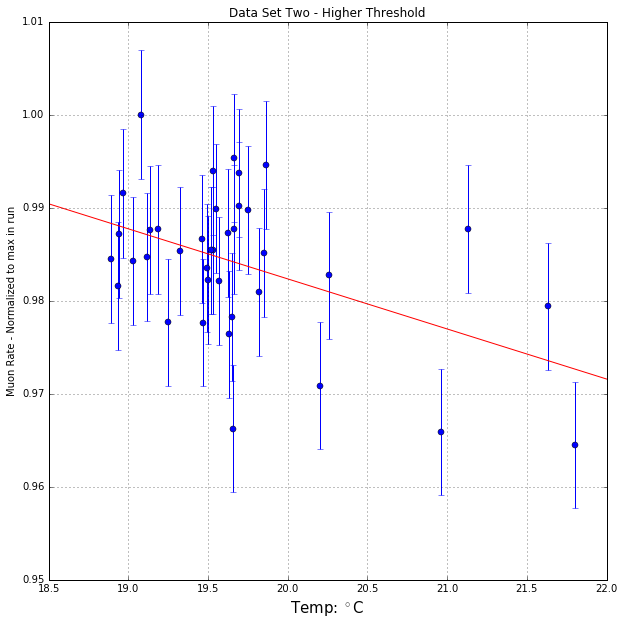

[[Model]]
    Model(linear)
[[Fit Statistics]]
    # function evals   = 8
    # data points      = 38
    # variables        = 2
    chi-square         = 39.562
    reduced chi-square = 1.099
[[Variables]]
    slope:      -0.00538398 +/- 0.001730 (32.13%) (init=-0.0115128)
    intercept:   1.09003648 +/- 0.034080 (3.13%) (init= 1.214896)
[[Correlations]] (unreported correlations are <  0.100)
    C(slope, intercept)          = -0.999 



In [219]:
pars = cor_mod.guess(cor_counts,x=total_temp[:len(cor_counts)])
cor_counts_8,yerr8=normalize(binned_counts_8,np.sqrt(binned_counts_8))
out = cor_mod.fit(cor_counts_8,pars,x=total_temp[36:36+len(cor_counts_8)],weights=1./yerr8)
x_mod=np.linspace(18.5,22)
y_mod=cor_mod.eval(out.params,x=x_mod)

plt.figure(figsize=(10,10))
#plt.errorbar(total_temp[:len(cor_counts)],cor_counts,fmt='ko',yerr=yerr1)
plt.errorbar(total_temp[36:36+len(cor_counts_8)],cor_counts_8,fmt='bo',yerr=yerr8)
plt.plot(x_mod,y_mod,'r-')
plt.xlabel('Temp'+r': $^\circ$'+'C',fontsize=15)
plt.ylabel('Muon Rate - Normalized to max in run')
plt.title('Data Set Two - Higher Threshold')
plt.grid()
plt.show()

print(out.fit_report())


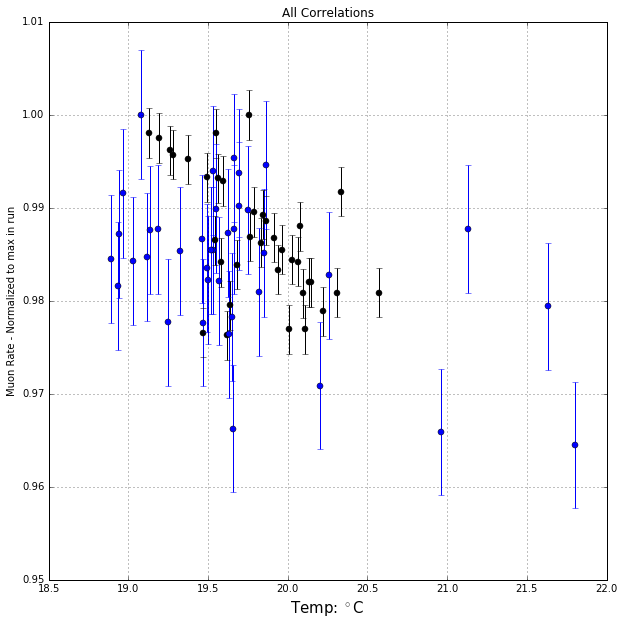

In [236]:
plt.figure(figsize=(10,10))
plt.errorbar(total_temp[:len(cor_counts)],cor_counts,fmt='ko',yerr=yerr1)
plt.errorbar(total_temp[36:36+len(cor_counts_8)],cor_counts_8,fmt='bo',yerr=yerr8)
#plt.plot(x_mod,y_mod,'r-')

plt.xlabel('Temp'+r': $^\circ$'+'C',fontsize=15)
plt.ylabel('Muon Rate - Normalized to max in run')
plt.title('All Correlations')

plt.grid()
plt.show()

In [248]:
with open("Data/binnedTemp.txt", "w") as text_file:
    text_file.write("#Hours\tTemp(C)\n")
    for i in range(len(total_temp)):
        text_file.write(str(i)+'\t'+str(total_temp[i])+'\n')